# Une solution à la compétition de machine learning 2A

In [ ]:
from pyensae.datasource import download_data
download_data("ensae_competition_2016.zip",
              url="https://github.com/sdpython/ensae_teaching_cs/raw/master/_doc/competitions/2016_ENSAE_2A/")

In [ ]:
# packages
import pandas as pd
import numpy as np
from sklearn import svm, linear_model, datasets, metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess

In [ ]:
# dataframe
df = pd.read_excel("default_of_credit_card_clients.xls", header=[0, 1],encoding="utf8",index_col=0)
df.head(20)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [ ]:
# Retrait 2ème ligne header

df1 = df.copy()
df1.columns = df1.columns.droplevel(-1)

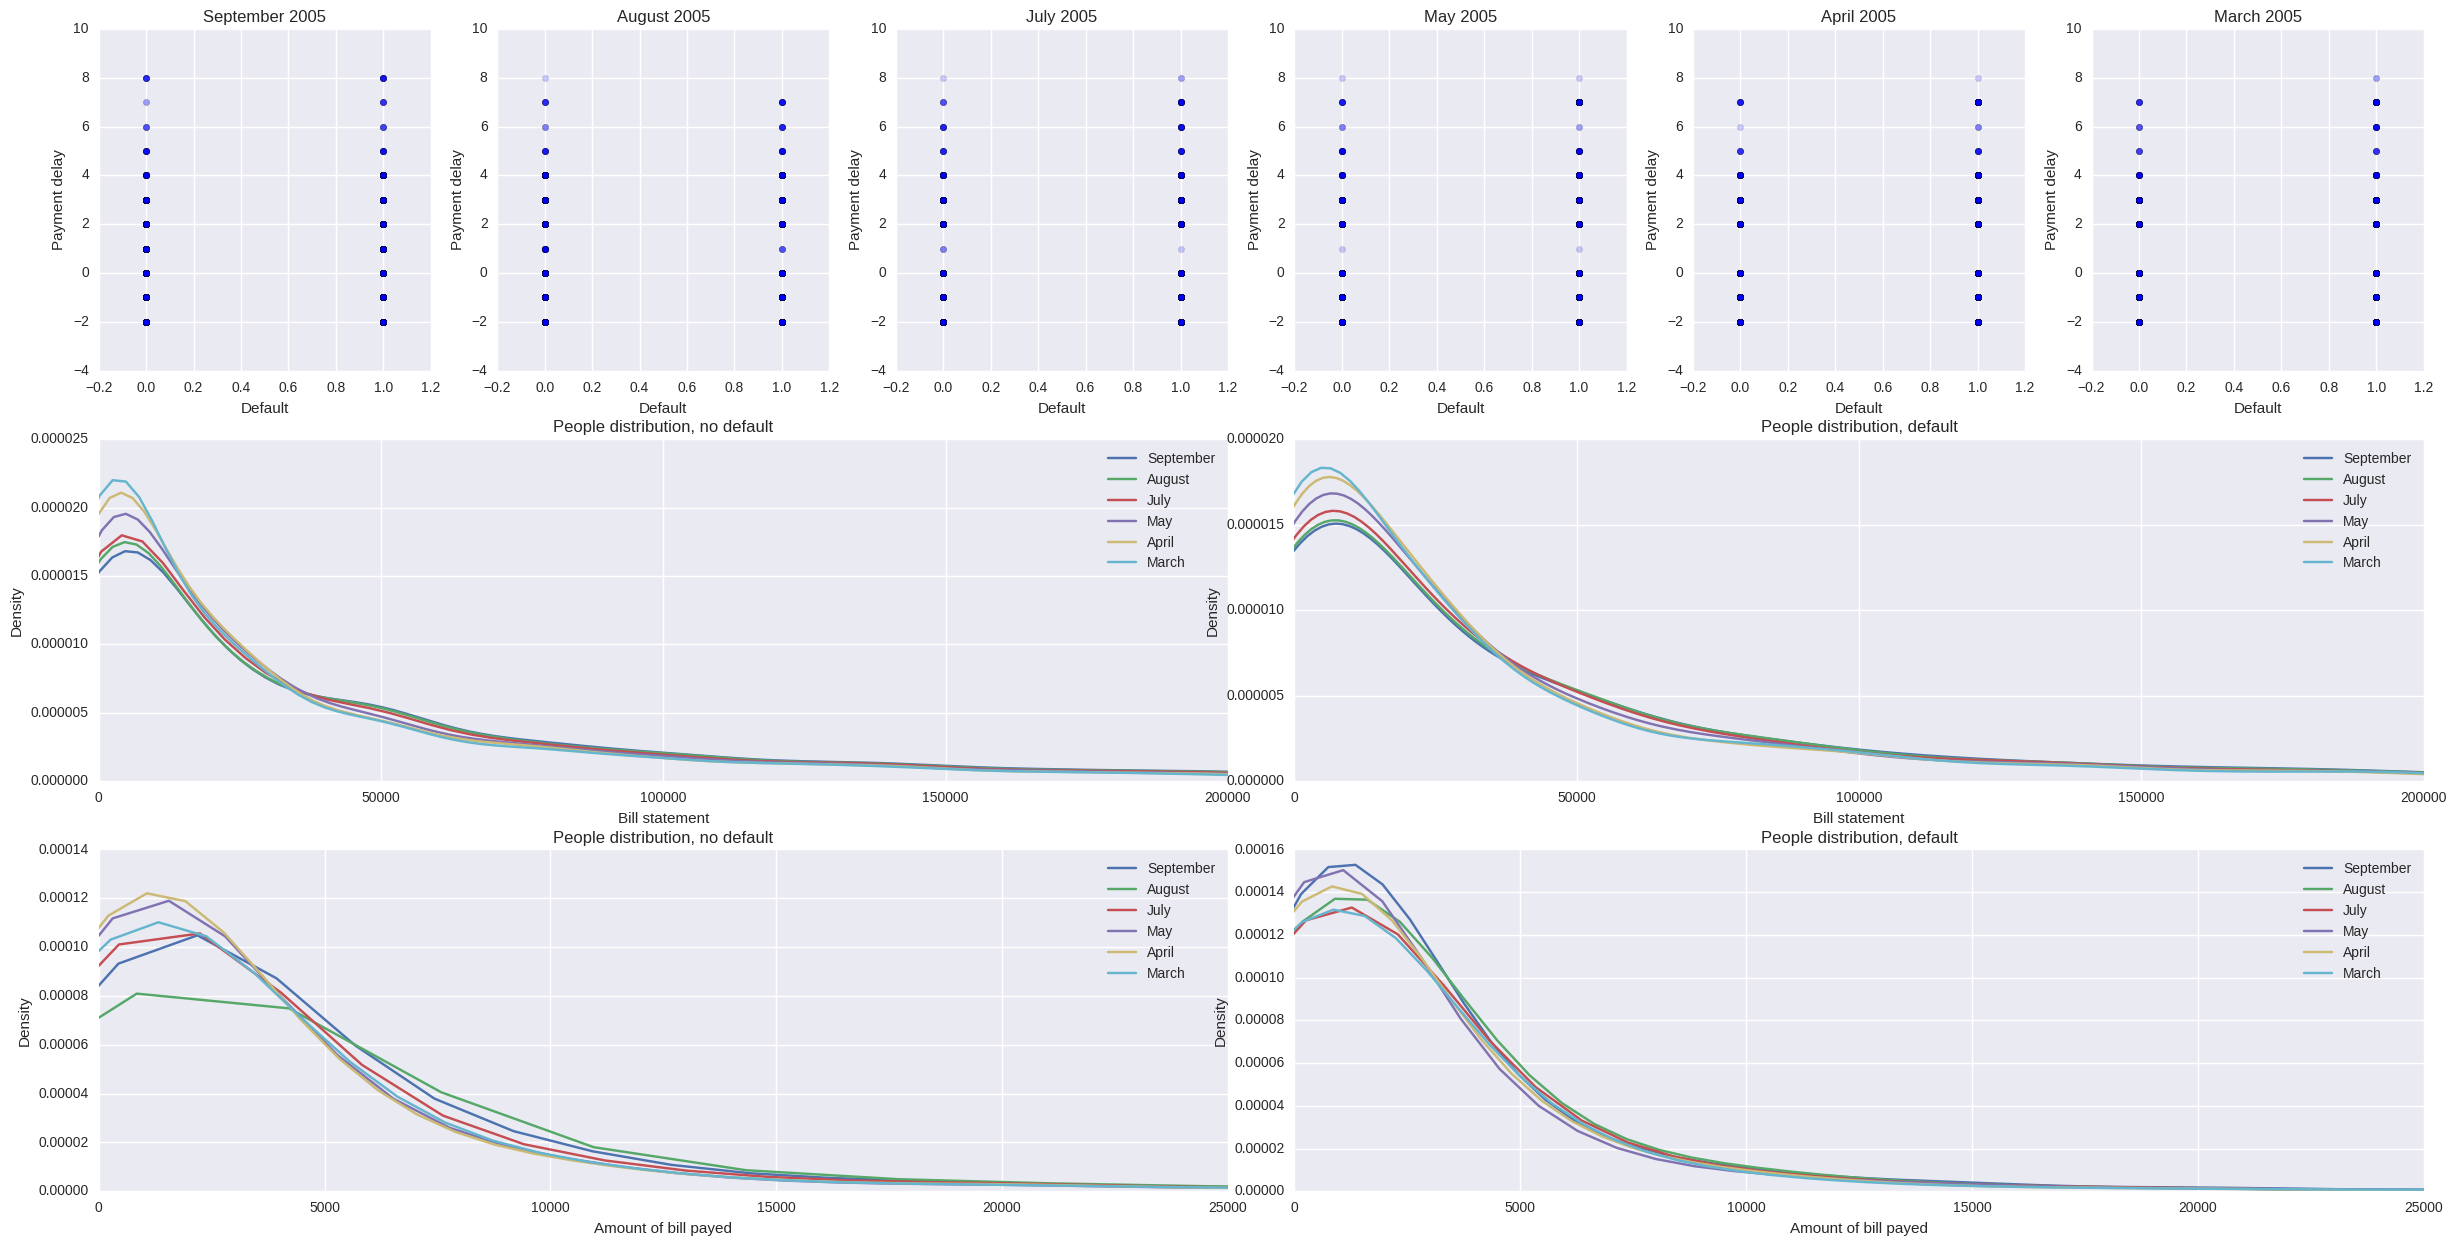

In [ ]:
# statistiques descriptives

# paramètres des graphes
fig = plt.figure(figsize=(30,15), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

'''graphs - the history of past payment'''

# September 2005
plt.subplot2grid((3,6),(0,0))
plt.scatter(df1.Y, df1.X6, alpha=alpha_scatterplot)
# axe x
plt.xlabel("Default")
# axe y
plt.ylabel("Payment delay")
# grid - titre                        
plt.grid(b=True, which='major', axis='y')  
plt.title("September 2005")

# August 2005
plt.subplot2grid((3,6),(0,1))
plt.scatter(df1.Y, df1.X7, alpha=alpha_scatterplot)
# axe x
plt.xlabel("Default")
# axe y
plt.ylabel("Payment delay")
# grid - titre                         
plt.grid(b=True, which='major', axis='y')  
plt.title("August 2005")

# July 2005
plt.subplot2grid((3,6),(0,2))
plt.scatter(df1.Y, df1.X8, alpha=alpha_scatterplot)
# axe x
plt.xlabel("Default")
# axe y
plt.ylabel("Payment delay")
# grid - titre                         
plt.grid(b=True, which='major', axis='y')  
plt.title("July 2005")

# May 2005
plt.subplot2grid((3,6),(0,3))
plt.scatter(df1.Y, df1.X9, alpha=alpha_scatterplot)
# axe x
plt.xlabel("Default")
# axe y
plt.ylabel("Payment delay")
# grid - titre                         
plt.grid(b=True, which='major', axis='y')  
plt.title("May 2005")

# April 2005
plt.subplot2grid((3,6),(0,4))
plt.scatter(df1.Y, df1.X10, alpha=alpha_scatterplot)
# axe x
plt.xlabel("Default")
# axe y
plt.ylabel("Payment delay")
# grid - titre             
plt.grid(b=True, which='major', axis='y')  
plt.title("April 2005")

# March 2005
plt.subplot2grid((3,6),(0,5))
plt.scatter(df1.Y, df1.X11, alpha=alpha_scatterplot)
# axe x
plt.xlabel("Default")
# axe y
plt.ylabel("Payment delay")
# grid - titre                          
plt.grid(b=True, which='major', axis='y')  
plt.title("March 2005")


'''Graphs - bill statement'''

# personnes pas en défaut de paiement
ax1 = plt.subplot2grid((3,6),(1,0), colspan=3)
# kernel density
df1.X12[df1.Y == 0].plot(kind='kde')    
df1.X13[df1.Y == 0].plot(kind='kde')
df1.X14[df1.Y == 0].plot(kind='kde')
df1.X15[df1.Y == 0].plot(kind='kde')
df1.X16[df1.Y == 0].plot(kind='kde')
df1.X17[df1.Y == 0].plot(kind='kde')
# axes
plt.xlabel("Bill statement")    
plt.title("People distribution, no default")
# limites
ax1.set_xlim(0, 200000)
# légende
plt.legend(('September','August','July','May','April','March'),loc='best')

# personnes en défaut de paiement
ax2 = plt.subplot2grid((3,6),(1,3), colspan=3)
# kernel density
df1.X12[df1.Y == 1].plot(kind='kde')    
df1.X13[df1.Y == 1].plot(kind='kde')
df1.X14[df1.Y == 1].plot(kind='kde')
df1.X15[df1.Y == 1].plot(kind='kde')
df1.X16[df1.Y == 1].plot(kind='kde')
df1.X17[df1.Y == 1].plot(kind='kde')
# axes
plt.xlabel("Bill statement")    
plt.title("People distribution, default")
# limites
ax2.set_xlim(0, 200000)
# légende
plt.legend(('September','August','July','May','April','March'),loc='best')


'''Graphs - amount of bill payed'''

# personnes pas en défaut de paiement
ax1 = plt.subplot2grid((3,6),(2,0), colspan=3)
# kernel density
df1.X18[df1.Y == 0].plot(kind='kde')    
df1.X19[df1.Y == 0].plot(kind='kde')
df1.X20[df1.Y == 0].plot(kind='kde')
df1.X21[df1.Y == 0].plot(kind='kde')
df1.X22[df1.Y == 0].plot(kind='kde')
df1.X23[df1.Y == 0].plot(kind='kde')
# axes
plt.xlabel("Amount of bill payed")    
plt.title("People distribution, no default")
# limites
ax1.set_xlim(0, 25000)
# légende
plt.legend(('September','August','July','May','April','March'),loc='best')

# personnes en défaut de paiement
ax2 = plt.subplot2grid((3,6),(2,3), colspan=3)
# kernel density
df1.X18[df1.Y == 1].plot(kind='kde')    
df1.X19[df1.Y == 1].plot(kind='kde')
df1.X20[df1.Y == 1].plot(kind='kde')
df1.X21[df1.Y == 1].plot(kind='kde')
df1.X22[df1.Y == 1].plot(kind='kde')
df1.X23[df1.Y == 1].plot(kind='kde')
# axes
plt.xlabel("Amount of bill payed")    
plt.title("People distribution, default")
# limites
ax2.set_xlim(0, 25000)
# légende
plt.legend(('September','August','July','May','April','March'),loc='best')

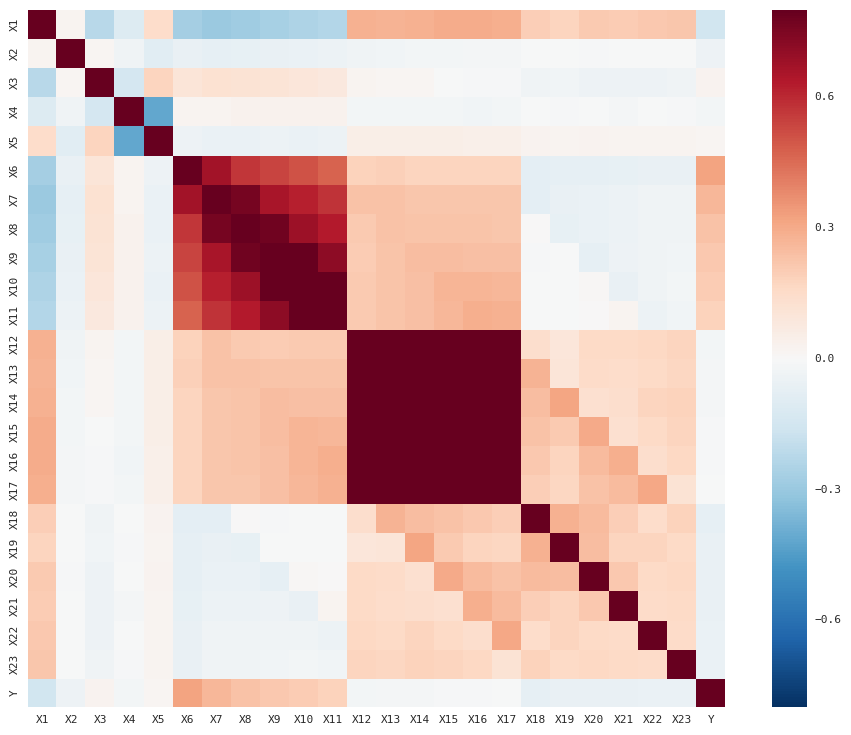

In [ ]:
# Matrice des corrélations

sns.set(context="paper", font="monospace")
corrmat = df1.corr()

# atplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

In [ ]:
# on modifie les colonnes (création de variables d'intérêt)

df1['TotalDelay'] = df1.X11 + 2*df1.X10 + 4*df1.X9 + 8*df1.X8 + 16*df1.X7 + 32*df1.X6
df1['TotalPayment'] = df1.X23 + 2*df1.X22 + 3*df1.X21 + 4*df1.X20 + 5*df1.X19 + 6*df1.X18
df1['PartMay'] = -(df1.X22 - df1.X17)/(df1.X17 + 1)
df1['PartJune'] = -(df1.X21 - df1.X16)/(df1.X16 + 1)
df1['PartJuly'] = -(df1.X20 - df1.X15)/(df1.X15 + 1)
df1['PartAugust'] = -(df1.X19 - df1.X14)/(df1.X14 + 1)
df1['PartSeptember'] = -(df1.X18 - df1.X13)/(df1.X13 + 1)
df1.head(20)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X22,X23,Y,TotalDelay,TotalPayment,PartMay,PartJune,PartJuly,PartAugust,PartSeptember
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,1,78,3445,0.000000,0.000000,0.000000,0.000000,0.999678
2,120000,2,2,2,26,-1,2,0,0,0,...,0,2000,1,2,14000,0.999693,0.710359,0.694164,0.626910,0.999421
3,90000,2,2,2,34,0,0,0,0,0,...,1000,5000,0,0,30608,0.935627,0.933039,0.930156,0.889307,0.891717
4,50000,2,2,1,37,0,0,0,0,0,...,1069,1000,0,0,33333,0.963788,0.961982,0.957584,0.959020,0.958515
5,50000,1,2,1,57,-1,0,-1,0,0,...,689,679,0,-40,264462,0.963935,0.529900,0.522420,-0.023608,0.647152
6,50000,1,1,2,37,0,0,0,0,0,...,1000,800,0,0,32503,0.950012,0.948981,0.966074,0.968477,0.956177
7,500000,1,1,2,29,0,0,0,0,0,...,13750,13770,0,0,783987,0.970986,0.958096,0.929972,0.910112,0.866510
8,100000,2,2,2,23,0,-1,-1,0,0,...,1687,1542,0,-25,11944,-1.971831,4.683544,0.995495,0.000000,0.000000
9,140000,2,3,1,28,0,0,2,0,0,...,1000,1000,0,16,27702,0.730914,0.915126,0.964543,0.999917,0.763780
10,20000,1,3,2,35,-2,-2,-2,-2,-1,...,1122,0,0,-123,41265,0.919284,0.000000,0.000000,0.000000,0.000000


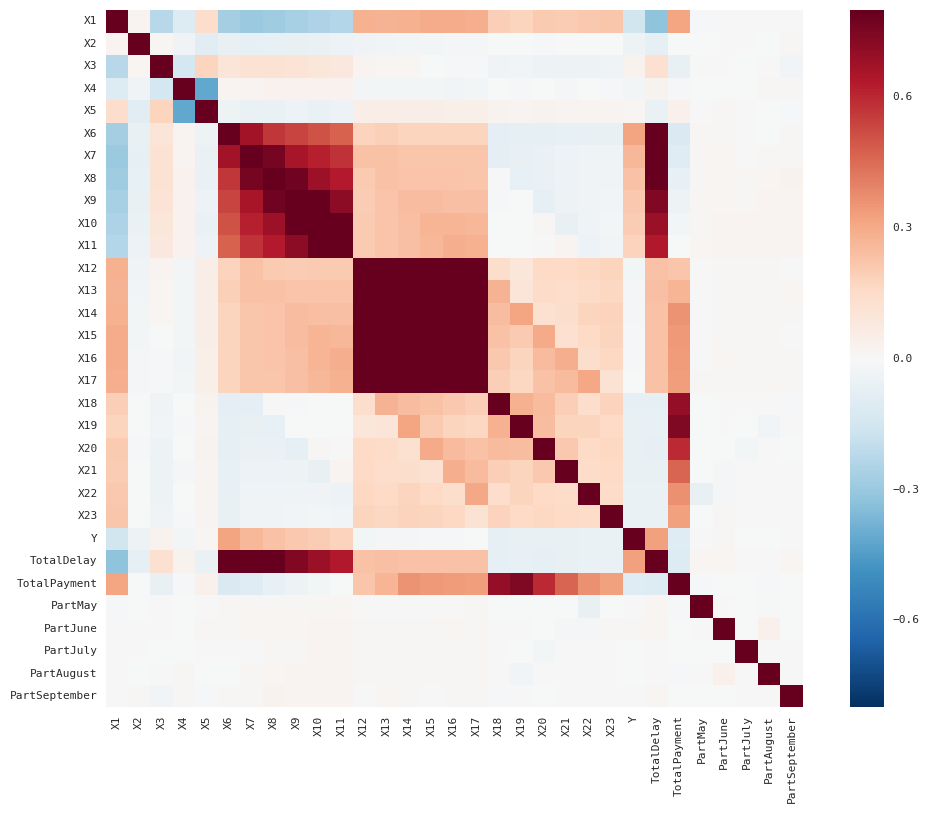

In [ ]:
# Matrice des corrélations

sns.set(context="paper", font="monospace")
corrmat = df1.corr()

# matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

In [ ]:
# drop some columns

df1 = df1.drop(['X'+str(n) for n in range(7,12)] + ['X'+str(n) for n in range(13,24)], axis=1)
df1.head(20)

,X1,X2,X3,X4,X5,X6,X12,Y,TotalDelay,TotalPayment,PartMay,PartJune,PartJuly,PartAugust,PartSeptember
1,20000,2,2,1,24,2,3913,1,78,3445,0.000000,0.000000,0.000000,0.000000,0.999678
2,120000,2,2,2,26,-1,2682,1,2,14000,0.999693,0.710359,0.694164,0.626910,0.999421
3,90000,2,2,2,34,0,29239,0,0,30608,0.935627,0.933039,0.930156,0.889307,0.891717
4,50000,2,2,1,37,0,46990,0,0,33333,0.963788,0.961982,0.957584,0.959020,0.958515
5,50000,1,2,1,57,-1,8617,0,-40,264462,0.963935,0.529900,0.522420,-0.023608,0.647152
6,50000,1,1,2,37,0,64400,0,0,32503,0.950012,0.948981,0.966074,0.968477,0.956177
7,500000,1,1,2,29,0,367965,0,0,783987,0.970986,0.958096,0.929972,0.910112,0.866510
8,100000,2,2,2,23,0,11876,0,-25,11944,-1.971831,4.683544,0.995495,0.000000,0.000000
9,140000,2,3,1,28,0,11285,0,16,27702,0.730914,0.915126,0.964543,0.999917,0.763780
10,20000,1,3,2,35,-2,0,0,-123,41265,0.919284,0.000000,0.000000,0.000000,0.000000


/home/clement/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


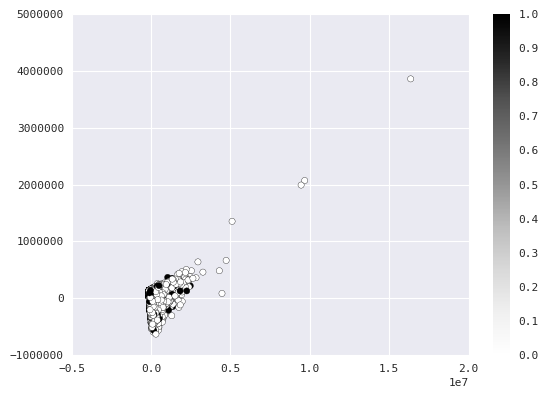

In [ ]:
from sklearn.decomposition import RandomizedPCA
from numpy import inf
pca = RandomizedPCA(n_components=2)
dfpca = df1.as_matrix()
dfpca[dfpca == -inf] = 0
y = dfpca[:, 7]
proj = pca.fit_transform(dfpca[:, :7 + 8:])
plt.scatter(proj[:, 0], proj[:, 1], c=y)
plt.colorbar()

In [ ]:
# training/crossval set

X = df1.values
X[X==-inf] = 0
print(df1.head())
# training set
X_train = X[:, :]
Y_train = X[:, 7].ravel()
X_train = np.delete(X_train, 7, axis=1)
# expected result
expected = X[20000:, 7].ravel()
# cross-validation data set
X_cross = X[20000:, :]
X_cross = np.delete(X_cross, 7, axis=1)

       X1  X2  X3  X4  X5  X6    X12  Y  TotalDelay  TotalPayment   PartMay  \
1   20000   2   2   1  24   2   3913  1          78          3445  0.000000   
2  120000   2   2   2  26  -1   2682  1           2         14000  0.999693   
3   90000   2   2   2  34   0  29239  0           0         30608  0.935627   
4   50000   2   2   1  37   0  46990  0           0         33333  0.963788   
5   50000   1   2   1  57  -1   8617  0         -40        264462  0.963935   

   PartJune  PartJuly  PartAugust  PartSeptember  
1  0.000000  0.000000    0.000000       0.999678  
2  0.710359  0.694164    0.626910       0.999421  
3  0.933039  0.930156    0.889307       0.891717  
4  0.961982  0.957584    0.959020       0.958515  
5  0.529900  0.522420   -0.023608       0.647152  


In [ ]:
from sklearn.naive_bayes import GaussianNB

# train the model
GNB = GaussianNB()
GNB.fit(X_train, Y_train)

# use the model to predict the labels of the test data
predicted = GNB.predict(X_cross)

print(metrics.confusion_matrix(expected, predicted))

[[ 620 7302]
 [  54 2024]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBR = GradientBoostingClassifier()
GBR.fit(X_train,Y_train)
predicted = GBR.predict(X_cross)
print(metrics.confusion_matrix(expected, predicted))

[[7625  297]
 [1305  773]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNC = KNeighborsClassifier(5)
KNC.fit(X_train, Y_train)
predicted = KNC.predict(X_cross)
print(metrics.confusion_matrix(expected, predicted))
pred = KNC.predict_proba(X_train)

[[7584  338]
 [1445  633]]


In [ ]:
print(pred[:20])
print(Y_train[:20])

[[ 0.7  0.3]
 [ 0.7  0.3]
 [ 0.7  0.3]
 [ 1.   0. ]
 [ 0.8  0.2]
 [ 0.6  0.4]
 [ 0.8  0.2]
 [ 0.5  0.5]
 [ 0.7  0.3]
 [ 0.9  0.1]
 [ 0.9  0.1]
 [ 0.9  0.1]
 [ 1.   0. ]
 [ 0.5  0.5]
 [ 0.8  0.2]
 [ 0.5  0.5]
 [ 0.5  0.5]
 [ 0.7  0.3]
 [ 0.6  0.4]
 [ 0.7  0.3]]
[ 1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.
  0.  0.]


In [ ]:
# neural network

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

# optimisation - choix du nombre de couches
param_grid = [
  {'hidden_layer_sizes': [(nb,) for nb in range(20,500,10)]}, {'alpha': [a/100 for a in range(0,100,5)]}
 ]

neural2 = GridSearchCV(MLPClassifier(), param_grid)
neural2.fit(X_train, Y_train)
neural2.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(170,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [ ]:
neural = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(170,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
neural.fit(X_train, Y_train)
predicted = neural.predict(X_cross)
print(metrics.confusion_matrix(expected, predicted))
neural.predict_proba(X_cross[:50])

[[6964  958]
 [1384  694]]


array([[  1.00000000e+000,   1.71753222e-111],
       [  1.00000000e+000,   1.07794534e-022],
       [  1.00000000e+000,   5.93170002e-076],
       [  1.00000000e+000,   3.35120466e-182],
       [  1.00000000e+000,   1.53596696e-046],
       [  1.00000000e+000,   3.15376458e-035],
       [  1.00000000e+000,   4.37889912e-079],
       [  1.00000000e+000,   1.45050730e-013],
       [  1.00000000e+000,   0.00000000e+000],
       [  1.00000000e+000,   7.89686887e-101],
       [  1.00000000e+000,   0.00000000e+000],
       [  1.00000000e+000,   2.75082021e-225],
       [  9.99995460e-001,   4.53971883e-006],
       [  1.00000000e+000,   5.00494234e-059],
       [  1.00000000e+000,   3.28272155e-044],
       [  1.00000000e+000,   2.12637261e-034],
       [  1.00000000e+000,   3.89624810e-046],
       [  1.00000000e+000,   1.05464623e-069],
       [  1.00000000e+000,   0.00000000e+000],
       [  1.00000000e+000,   1.32689231e-294],
       [  1.00000000e+000,   7.29514853e-026],
       [  0.0

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier

GPC = GaussianProcessClassifier()
GPC.fit(X_train, Y_train)
predicted = GPC.predict(X_cross)
print(metrics.confusion_matrix(expected, predicted))
GPC.predict_proba(X_cross)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(5)
RFC.fit(X_train, Y_train)
predicted = RFC.predict(X_cross)
print(metrics.confusion_matrix(expected, predicted))
print(RFC.predict_proba(X_cross))
print(expected)

[[7860   62]
 [ 206 1872]]
[[ 0.4  0.6]
 [ 1.   0. ]
 [ 1.   0. ]
 ..., 
 [ 0.   1. ]
 [ 0.   1. ]
 [ 0.4  0.6]]
[ 1.  0.  0. ...,  1.  1.  1.]


In [ ]:
from sklearn.svm import SVC

SVC = SVC(probability = True)
SVC.fit(X_train, Y_train)
predicted = SVC.predict(X_cross)
print(metrics.confusion_matrix(expected, predicted))
print(SVC.predict_proba(X_cross))
print(expected)

[[7899   23]
 [2066   12]]
[[ 0.77306158  0.22693842]
 [ 0.77306158  0.22693842]
 [ 0.77306158  0.22693842]
 ..., 
 [ 0.77306158  0.22693842]
 [ 0.77306158  0.22693842]
 [ 0.77306158  0.22693842]]
[ 1.  0.  0. ...,  1.  1.  1.]


In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, Y_train)
predicted = LR.predict(X_cross)
print(metrics.confusion_matrix(expected, predicted))
print(LR.predict_proba(X_train))
print(Y_train)

[[7657  265]
 [1546  532]]
[[ 0.39455886  0.60544114]
 [ 0.65281074  0.34718926]
 [ 0.70150524  0.29849476]
 ..., 
 [ 0.88106039  0.11893961]
 [ 0.76332593  0.23667407]
 [ 0.78603904  0.21396096]]
[ 1.  1.  0. ...,  0.  0.  0.]


In [ ]:
#--------------#
# modèle final #
#--------------#

# dataframe
dfend = pd.read_csv("ensae_competition_test_X.csv", header=[0, 1], sep='\t', encoding="utf8", index_col=0)
dfend.columns = dfend.columns.droplevel(-1)

# modifications colonnes
dfend['TotalDelay'] = dfend.X11 + 2*dfend.X10 + 4*dfend.X9 + 8*dfend.X8 + 16*dfend.X7 + 32*dfend.X6
dfend['TotalPayment'] = dfend.X23 + 2*dfend.X22 + 3*dfend.X21 + 4*dfend.X20 + 5*dfend.X19 + 6*dfend.X18
dfend['PartMay'] = -(dfend.X22 - dfend.X17)/(dfend.X17 + 1)
dfend['PartJune'] = -(dfend.X21 - dfend.X16)/(dfend.X16 + 1)
dfend['PartJuly'] = -(dfend.X20 - dfend.X15)/(dfend.X15 + 1)
dfend['PartAugust'] = -(dfend.X19 - dfend.X14)/(dfend.X14 + 1)
dfend['PartSeptember'] = -(dfend.X18 - dfend.X13)/(dfend.X13 + 1)
dfend = dfend.drop(['X'+str(n) for n in range(7,12)] + ['X'+str(n) for n in range(13,24)], axis=1)

# dataset as array
X = dfend.values
X[X==-inf] = 0

In [ ]:
# prédictions

# réseau de neuronnes
l = neural.predict(X)
text_file = open('answerN.txt','w')
for e in l:
    text_file.write(str(int(e)) + '\n')
text_file.close()

In [ ]:
# random forest
l = RFC.predict(X)
text_file = open('answerRF.txt','w')
for e in l:
    text_file.write(str(int(e)) + '\n')
text_file.close()